#✅ Objective:
To understand and implement K-Means Clustering using the Elbow Method for finding the optimal number of clusters.

#🧠 Concepts Covered:
What is K-Means Clustering?

Use of Elbow Method to determine optimal number of clusters.

Applying K-Means on synthetic data and visualizing results.

#📦 Required Libraries:?

In [1]:
# Install required libraries if not already available (for Colab users)
!pip install -q matplotlib seaborn scikit-learn


In [2]:
import numpy as np  # Import the fundamental package for scientific computing with Python, often used for array operations.
import matplotlib.pyplot as plt  # Import the standard plotting library for creating static, interactive, and animated visualizations.
import seaborn as sns  # Import a high-level data visualization library based on matplotlib, providing a more attractive interface for statistical graphics.

from sklearn.datasets import make_blobs  # Import make_blobs to generate synthetic isotropic Gaussian blobs for clustering.
from sklearn.cluster import KMeans  # Import KMeans, a popular algorithm for partitioning n observations into k clusters.

#📊 Step 1: Generate Synthetic Dataset

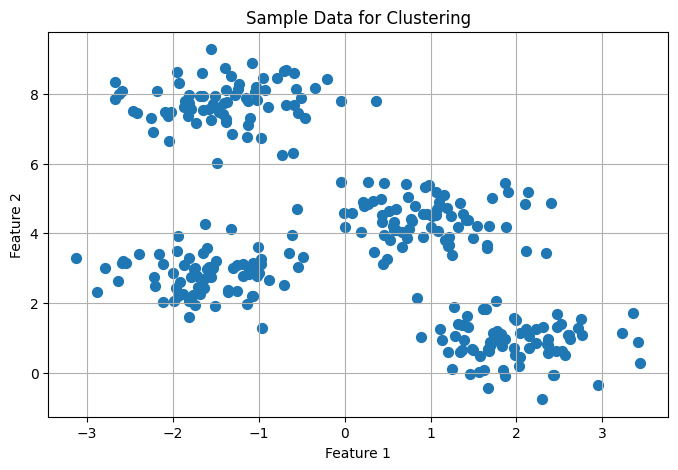

In [3]:
# Generate synthetic dataset with 4 centers (clusters)
# make_blobs creates isotropic Gaussian blobs for clustering.
# n_samples: Total number of points equally divided among clusters (here, 300 points).
# centers: The number of centers to generate (here, 4 distinct clusters).
# cluster_std: The standard deviation of the clusters (0.60 makes clusters relatively tight).
# random_state: Determines random number generation for dataset creation, ensuring reproducibility.
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the generated dataset
plt.figure(figsize=(8, 5)) # Create a new figure with a specified size (width=8 inches, height=5 inches).
plt.scatter(X[:, 0], X[:, 1], s=50) # Create a scatter plot:
                                    # X[:, 0] represents the first feature (x-coordinates of points).
                                    # X[:, 1] represents the second feature (y-coordinates of points).
                                    # s=50 sets the size of the markers.
plt.title("Sample Data for Clustering") # Set the title of the plot.
plt.xlabel("Feature 1") # Label for the x-axis.
plt.ylabel("Feature 2") # Label for the y-axis.
plt.grid(True) # Display a grid on the plot for better readability.
plt.show() # Display the plot.

#📈 Step 2: Elbow Method to Find Optimal k

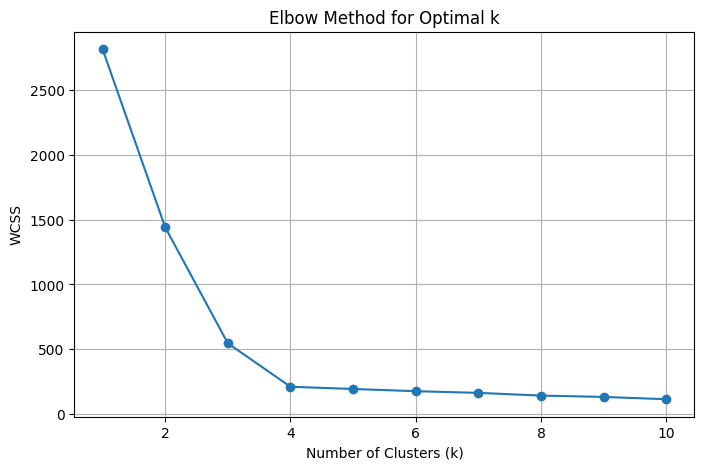

In [4]:
# Store Within-Cluster-Sum-of-Squares (WCSS) for each value of k
# WCSS measures the sum of squared distances between each point and the centroid of its assigned cluster.
# A lower WCSS generally indicates better clustering, but it decreases with more clusters.
wcss = []

# Test different number of clusters (from 1 to 10)
# We iterate through a range of possible 'k' values to find the optimal number of clusters.
for i in range(1, 11):
    # Initialize KMeans with 'i' clusters.
    # n_clusters: The number of clusters to form as well as the number of centroids to generate.
    # init='k-means++': This is a smart initialization technique that speeds up convergence
    #                   and generally leads to better clustering results than random initialization.
    # random_state=0: Ensures reproducibility of the centroid initialization.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto') # n_init='auto' is default in newer scikit-learn
    # Fit the KMeans model to the data (X).
    # This step performs the clustering for the current number of clusters (i).
    kmeans.fit(X)
    # Append the WCSS (inertia_) for the current number of clusters to the 'wcss' list.
    # inertia_ is the sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the "elbow"
# The "elbow" point in the plot is considered the optimal number of clusters,
# where the rate of decrease in WCSS significantly slows down.
plt.figure(figsize=(8, 5)) # Create a new figure with a specified size.
plt.plot(range(1, 11), wcss, marker='o') # Plot the WCSS values against the number of clusters (k).
                                        # marker='o' places a circle marker at each data point.
plt.title("Elbow Method for Optimal k") # Set the title of the plot.
plt.xlabel("Number of Clusters (k)") # Label for the x-axis.
plt.ylabel("WCSS") # Label for the y-axis.
plt.grid(True) # Display a grid for better readability.
plt.show() # Display the plot.

🔍 Explanation:

WCSS decreases with more clusters, but the point after which the decrease becomes minimal is the "elbow point". That is considered the best k.

#🔍 Step 3: Apply K-Means with Optimal k

In [7]:
# Based on the elbow method, we observe a distinct "elbow" at k=4 in the WCSS plot.
# This suggests that 4 is the optimal number of clusters for this dataset,
# as adding more clusters beyond this point provides diminishing returns in reducing WCSS.
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init='auto')
# n_clusters=4: We are now explicitly setting the number of clusters to 4 based on our analysis.
# init='k-means++': Continues to use the smart initialization method.
# random_state=0: Ensures reproducibility of the clustering results.
# n_init='auto': (Added for newer scikit-learn versions) Specifies the number of times the k-means algorithm will be run
#                with different centroid seeds. 'auto' chooses between 10 (default) and 1 for small datasets.

# Fit the KMeans model to the data X and predict the cluster assignments for each data point.
# kmeans.fit_predict(X) performs two actions:
# 1. Fits the KMeans model to the features X, determining the 4 cluster centroids.
# 2. Predicts the cluster label for each sample in X, assigning each data point to its closest centroid.
# The assigned cluster labels (0, 1, 2, or 3) are stored in y_kmeans.
y_kmeans = kmeans.fit_predict(X)

#🎨 Step 4: Visualize Clusters

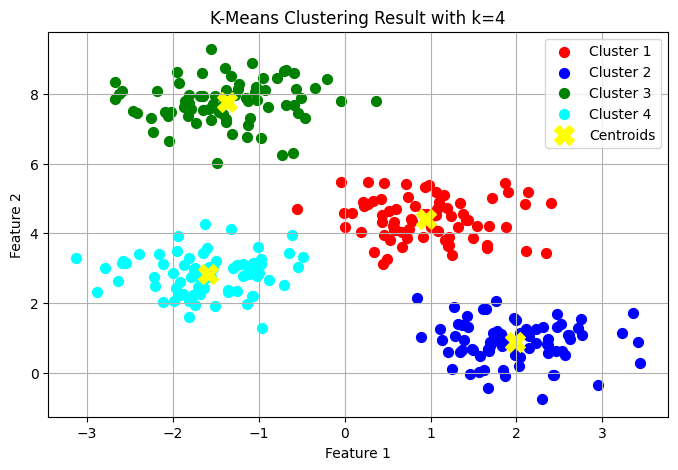

In [8]:
# Visualize the clusters and centroids
plt.figure(figsize=(8, 5)) # Create a new figure with a specified size (width=8 inches, height=5 inches).

# Plot each cluster separately to assign different colors and labels.
# X[y_kmeans == 0, 0]: Selects all data points belonging to Cluster 0, and then takes their first feature (x-coordinate).
# X[y_kmeans == 0, 1]: Selects all data points belonging to Cluster 0, and then takes their second feature (y-coordinate).
# s=50: Sets the size of the data point markers.
# c='red': Assigns the color red to Cluster 0.
# label='Cluster 1': Provides a label for this scatter plot, which will appear in the legend.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')

# Plot the cluster centroids.
# kmeans.cluster_centers_[:, 0]: Takes the x-coordinate of all cluster centroids.
# kmeans.cluster_centers_[:, 1]: Takes the y-coordinate of all cluster centroids.
# s=200: Sets a larger size for the centroid markers to make them stand out.
# c='yellow': Assigns the color yellow to the centroids.
# marker='X': Uses an 'X' shape as the marker for the centroids.
# label='Centroids': Provides a label for the centroids in the legend.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='X', label='Centroids')

plt.title("K-Means Clustering Result with k=4") # Set the title of the plot.
plt.xlabel("Feature 1") # Label for the x-axis.
plt.ylabel("Feature 2") # Label for the y-axis.
plt.legend() # Display the legend, which shows the labels for each cluster and the centroids.
plt.grid(True) # Display a grid on the plot for better readability.
plt.show() # Display the plot.

#📌 Summary:
K-Means is an unsupervised learning algorithm used for clustering data into k clusters.

The Elbow Method helps determine the optimal number of clusters by plotting WCSS.

Visualization helps interpret the clustering results and centroids clearly.



#Certainly! Although K-Means Clustering is an unsupervised learning algorithm (meaning we typically don’t have ground-truth labels to evaluate like in classification), if we do have true labels (like in synthetic datasets), we can still evaluate the clustering using metrics like:

Adjusted Rand Index (ARI)

Silhouette Score

Calinski-Harabasz Index

Davies-Bouldin Index

In [9]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Adjusted Rand Index (ARI) compares the clustering results against a known ground truth.
# It measures the similarity of the two assignments, ignoring permutations and with chance correction.
# A perfect score is 1.0, while a random assignment typically yields a score close to 0.
# y_true: The true cluster labels (ground truth).
# y_kmeans: The cluster labels assigned by our KMeans model.
ari = adjusted_rand_score(y_true, y_kmeans)

# Silhouette Score measures how similar an object is to its own cluster (cohesion)
# compared to other clusters (separation).
# The score ranges from -1 to 1:
#   - Closer to 1: Indicates well-separated clusters.
#   - Closer to 0: Indicates overlapping clusters.
#   - Closer to -1: Indicates data points might be assigned to the wrong clusters.
# X: The original data points.
# y_kmeans: The cluster labels assigned by our KMeans model.
silhouette = silhouette_score(X, y_kmeans)

# Calinski-Harabasz Index (also known as Variance Ratio Criterion) is a metric
# where a higher score relates to a model with better defined clusters.
# It's calculated as the ratio of the between-cluster dispersion mean to the within-cluster dispersion.
# X: The original data points.
# y_kmeans: The cluster labels assigned by our KMeans model.
calinski = calinski_harabasz_score(X, y_kmeans)

# Davies-Bouldin Index is a metric where a lower score relates to a model
# with better separation between the clusters.
# It's calculated as the average similarity measure of each cluster with its most similar cluster.
# A lower value means that clusters are more separated and compact.
# X: The original data points.
# y_kmeans: The cluster labels assigned by our KMeans model.
davies = davies_bouldin_score(X, y_kmeans)

# Print all calculated evaluation metrics in a user-friendly format.
print("🔍 Model Evaluation Metrics:")
print(f"✅ Adjusted Rand Index: {ari:.3f}") # Display ARI, formatted to 3 decimal places.
print(f"✅ Silhouette Score: {silhouette:.3f}") # Display Silhouette Score, formatted to 3 decimal places.
print(f"✅ Calinski-Harabasz Index: {calinski:.3f}") # Display Calinski-Harabasz Index, formatted to 3 decimal places.
print(f"✅ Davies-Bouldin Index: {davies:.3f}") # Display Davies-Bouldin Index, formatted to 3 decimal places.

🔍 Model Evaluation Metrics:
✅ Adjusted Rand Index: 1.000
✅ Silhouette Score: 0.682
✅ Calinski-Harabasz Index: 1210.090
✅ Davies-Bouldin Index: 0.438
